<a href="https://colab.research.google.com/github/S4qk/Quantum-Computing-1st-CICC/blob/main/qrng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **QRNG** - *Quantum Random Number Generation*
* October 15°, 2025
#### CIC - IPN: *Qiskit Fall Fest*

> Alexander Sanchez

* How to install qiskit-aer:

You can install `qiskit-aer` using pip:

```bash
pip install qiskit-aer
```

Or if you prefer using conda:

```bash
conda install -c conda-forge qiskit-aer
```

**Note**: `qiskit-aer` is the high-performance simulator for Qiskit that provides noise models and advanced simulation capabilities. It's essential for running quantum circuits locally with realistic noise modeling.

* Define the quantum circuit

In [ ]:
pip install qiskit-aer

In [ ]:
!pip install pylatexenc

Quantum Circuit:


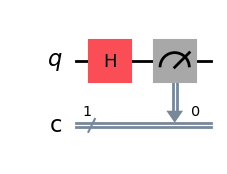

In [ ]:
# Perform a quantum random number generation using Qiskit simulating locally
# and visualize the results with matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Set up the quantum circuit
qc = QuantumCircuit(1, 1)
qc.h(0)  # Apply Hadamard gate to create superposition
qc.measure(0, 0)  # Measure the qubit

print("Quantum Circuit:")
qc.draw(output='mpl')

* Simulate the circuit


Measurement results: {'0': 523, '1': 501}


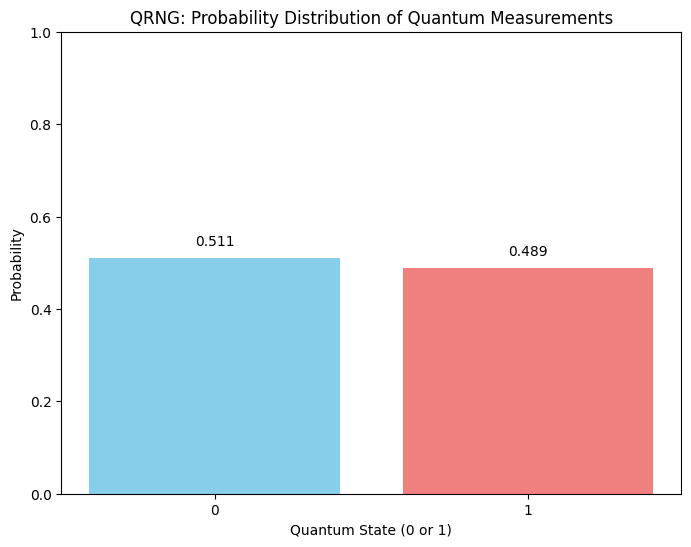

In [ ]:
# Simulate the circuit
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)
job = simulator.run(transpiled_circuit, shots=1024)
# job = simulator.run(transpiled_circuit, shots=1024, seed_simulator=42)
result = job.result()
counts = result.get_counts()

print(f"\nMeasurement results: {counts}")

# Alternative visualization using matplotlib
plt.figure(figsize=(8, 6))
states = list(counts.keys())
probabilities = [counts[state]/1024 for state in states]

plt.bar(states, probabilities, color=['skyblue', 'lightcoral'])
plt.xlabel('Quantum State (0 or 1)')
plt.ylabel('Probability')
plt.title('QRNG: Probability Distribution of Quantum Measurements')
plt.ylim(0, 1)

# Add probability labels on bars
for i, prob in enumerate(probabilities):
    plt.text(i, prob + 0.02, f'{prob:.3f}', ha='center', va='bottom')

plt.show()

* **Challenge**: Generate a random number (base 10) given a range between `n` and `m` using the quantum circuit above.


Random number between 10 and 50: 25

Generating 20 random numbers between 10 and 50:
[22, 28, 12, 48, 10, 31, 41, 40, 10, 22, 34, 47, 17, 31, 37, 31, 31, 16, 32, 48]


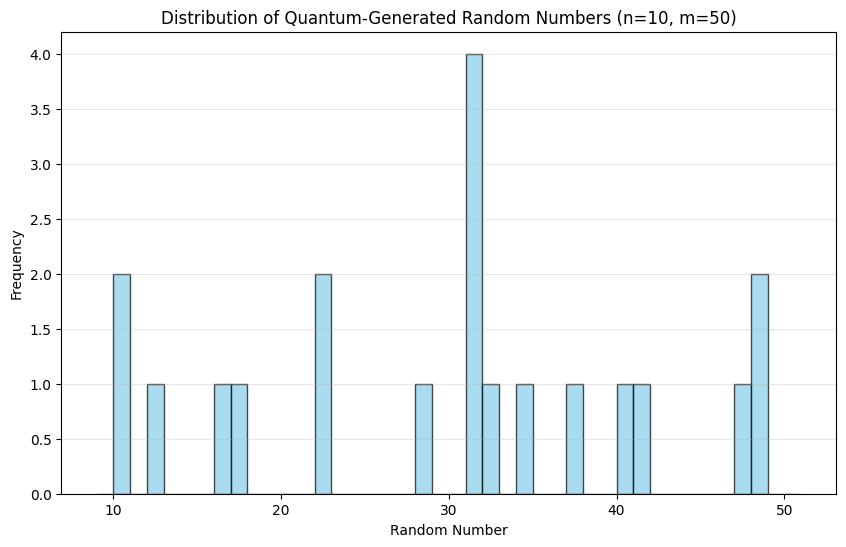

In [ ]:
simulator_instance = AerSimulator()

def get_random_bit() -> int:
    """
    Runs the quantum circuit for a single shot to generate one random bit.
    """
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    qc.measure(0, 0)
    transpiled_circuit = transpile(qc, simulator_instance)

    job = simulator_instance.run(transpiled_circuit, shots=1)
    result = job.result()
    counts = result.get_counts()

    return int(list(counts.keys())[0])

def generate_random_number(n: int, m: int) -> int:
    """
    Generates a random integer within the range [n, m] (inclusive)
    using the quantum bit generator.
    """
    if n > m:
        n, m = m, n # Ensure n <= m

    range_size = m - n + 1
    num_bits = range_size.bit_length()

    # Use rejection sampling to avoid bias
    while True:
        random_val = 0
        for _ in range(num_bits):
            random_val = (random_val << 1) | get_random_bit()

        if random_val < range_size:
            return n + random_val

# Example usage
n = 10
m = 50
random_number = generate_random_number(n, m)
print(f"\nRandom number between {n} and {m}: {random_number}")

# Generate multiple random numbers to verify distribution
print("\nGenerating 20 random numbers between 10 and 50:")
random_numbers = [generate_random_number(10, 50) for _ in range(20)]
print(random_numbers)

# Visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(random_numbers, bins=range(9, 52), edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Distribution of Quantum-Generated Random Numbers (n=10, m=50)')
plt.grid(axis='y', alpha=0.3)
plt.show()